<a href="https://colab.research.google.com/github/arief-sys/Arief-Prasetya-Nugraha_2306014_Praktikum_AI_2/blob/main/Sistem_Pakar_(Certainty_Factor_%26_Fuzzy_Logic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gejala_user = {
      "demam": 0.2,
      "batuk": 0.6,
      "sakit_tenggorokan": 0.5,
      "nyeri_otot": 0.4,
      "lelah": 0.5,
      "sakit_kepala": 0.6,
      "hidung_tersumbat": 0.7,
      "menggigil": 0.5
}
pengetahuan = {
    "flu": {
        "demam": 0.2,
        "batuk": 0.6,
        "sakit_tenggorokan": 0.5,
        "nyeri_otot": 0.5,
        "lelah": 0.6,
        "sakit_kepala": 0.7,
        "hidung_tersumbat": 0.8,
        "menggigil": 0.5
  }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
              cf_total = cf
              first = False
            else:
              cf_total = cf_total + cf * (1 - cf_total)
    return cf_total

cf_flu = hitung_cf(gejala_user, pengetahuan["flu"])
print(f"CF diagnosis Flu: {cf_flu:.2f}")

CF diagnosis Flu: 0.98


Jika "demam" diubah jadi 0.2, bagaimana hasilnya? Mengapa?
Karena Certainty Factor dihitung secara kumulatif, dan banyak gejala lain yang punya nilai CF tinggi (misalnya hidung_tersumbat = 0.56 dan sakit_kepala = 0.42). Jadi meskipun "demam" nilainya rendah, kombinasi gejala-gejala lain tetap membuat CF akhir tinggi.

In [ ]:
gejala_user = {
    "nyeri_sendi": 0.6,
    "bengkak_sendi": 0.8,
    "kaku_sendi_pagi": 0.5,
    "demam_ringan": 0.6,
    "kelelahan": 0.7,
    "berkurangnya_gerak_sendi": 0.4,
    "kemerahan_sendi": 0.8,
    "penurunan_nafsu_makan": 0.2,
    "nyeri_otot": 0.7
}
pengetahuan={
    "rheumatoid arthritis": {
        "nyeri_sendi": 0.5,
        "bengkak_sendi": 0.4,
        "kaku_sendi_pagi": 0.7,
        "deman_ringan": 0.4,
        "kelelahan": 0.7,
        "berkurangnya_gerak_sendi": 0.8,
        "kemerahan_sendi": 0.6,
        "penurunan_nafsu_makan": 0.5,
        "nyeri_otot": 0.6
    },
    "osteoarthritis": {
        "nyeri_sendi": 0.8,
        "bengkak sendi": 0.6,
        "kaku_sendi_pagi": 0.5,
        "berkurangnya_gerak_sendi": 0.7,
        "nyeri_otot": 0.5
    }
}

def hitung_cf(gejala_user, pengetahuan_pakar):
    cf_total = 0
    first = True
    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar:
            cf_pakar = pengetahuan_pakar[gejala]
            cf = cf_user * cf_pakar
            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf *(1 - cf_total)
    return cf_total

#Mendiagnosa dua penyakit berdasarkan gejala yang sama
for penyakit in pengetahuan:
    cf_result = hitung_cf(gejala_user, pengetahuan [penyakit])
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")

CF diagnosis rheumatoid arthritis: 0.97
CF diagnosis osteoarthritis: 0.82


In [ ]:
# Example 4: Diabetes Diagnosis with Weighted Symptoms
gejala_user={
    "sering_haus": 0.5,
    "sering_buang_air_kecil": 0.7,
    "penurunan_berat_badan": 0.4,
    "luka_lambat_sembuh": 0.3,
    "penglihatan_kabur": 0.6,
    "mudah_lelah": 0.7,
    "kesemutan": 0.6,
    "kulit_kering": 0.5,
    "gatal": 0.4,
    "infeksi_jamur": 0.6
}

#Pengetahuan pakar dengan bobot gejala
pengetahuan = {
    "diabetes_tipel": {
        "sering_haus": 0.5,
        "sering_buang_air_kecil": 0.3,
        "penurunan_berat_badan": 0.7,
        "luka lambat sembuh": 0.8,
        "mudah_lelah": 0.7,
        "kulit_kering": 0.6

    },
    "diabetes_tipe2": {
        "sering haus": 0.5,
        "sering_buang_air_kecil": 0.9,
        "penurunan_berat_badan": 0.2,
        "luka_lambat sembuh": 0.4,
        "penglihatan_kabur": 0.7,
        "kesemutan": 0.7,
        "gatal": 0.6,
        "infeksi_jamur": 0.6
    }
}

#Bobot kepentingan gejala (1-5)
bobot_gejala = {
    "sering_haus": 4,
    "sering_buang_air_kecil": 4,
    "penurunan_berat_badan": 3,
    "luka_lambat_sembuh": 5,
    "penglihatan_kabur": 2
}

def hitung_cf_weighted(gejala_user, pengetahuan_pakar, bobot):
    cf_total = 0
    first = True
    total_bobot = 0

    for gejala, cf_user in gejala_user.items():
        if gejala in pengetahuan_pakar and gejala in bobot:
            cf_pakar = pengetahuan_pakar[gejala]
            gejala_weight = bobot [gejala] / 5 # Normalisasi bobot (1-5) -> (0.2-1.0)
            cf = cf_user * cf_pakar * gejala_weight

            if first:
                cf_total = cf
                first = False
            else:
                cf_total = cf_total + cf * (1 - cf_total)

            total_bobot += gejala_weight

    #Normalisasi hasil berdasarkan total bobot
    if total_bobot > 0:
        cf_total = cf_total / total_bobot * len([g for g in gejala_user if g in pengetahuan_pakar])

    return cf_total

for penyakit in pengetahuan:
    cf_result = hitung_cf_weighted(gejala_user, pengetahuan [penyakit], bobot_gejala)
    print(f"CF diagnosis {penyakit}: {cf_result:.2f}")

CF diagnosis diabetes_tipel: 1.01
CF diagnosis diabetes_tipe2: 2.02


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.8 MB/s eta 0:00:00


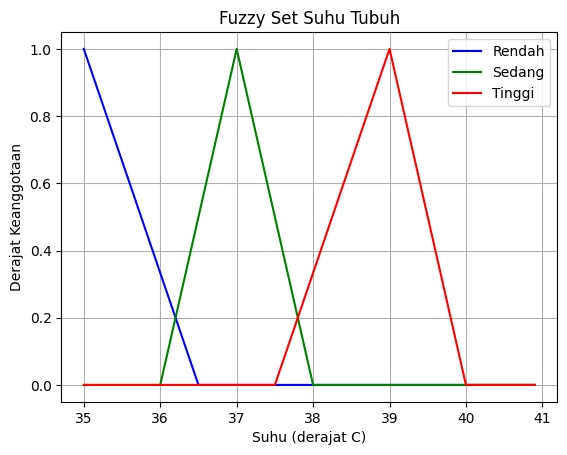

Derajat keanggotaan suhu 35.2 derajat C:
- Rendah: 0.87
- Sedang: 0.00
- Tinggi: 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

suhu = np.arange(35, 41, 0.1)

rendah = fuzz.trimf(suhu, [35, 35, 36.5])
sedang = fuzz.trimf(suhu, [36, 37, 38])
tinggi = fuzz.trimf (suhu, [37.5, 39, 40])

plt.figure()
plt.plot(suhu, rendah, 'b', label='Rendah')
plt.plot(suhu, sedang, 'g', label='Sedang')
plt.plot(suhu, tinggi, 'r', label='Tinggi')
plt.title('Fuzzy Set Suhu Tubuh')
plt.xlabel('Suhu (derajat C)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

input_suhu = 35.2
suhu_rendah = fuzz.interp_membership(suhu, rendah, input_suhu)
suhu_sedang = fuzz.interp_membership (suhu, sedang, input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu, tinggi, input_suhu)

print(f"Derajat keanggotaan suhu {input_suhu} derajat C:")
print(f"- Rendah: {suhu_rendah:.2f}")
print(f"- Sedang: {suhu_sedang:.2f}")
print(f"- Tinggi: {suhu_tinggi:.2f}")

Ubah input_suhu jadi 22°C. Apa yang terjadi?
Karena nilai 22°C berada di luar range suhu = np.arange(35, 41, 0.1).

Fungsi fuzz.interp_membership() hanya menginterpolasi dalam rentang suhu yang diberikan (35°C – 40.9°C), jadi kalau kamu memasukkan angka di bawah 35°C (seperti 22), maka:
-Tidak ada interpolasi,
-Nilainya dianggap di luar domain fungsi keanggotaan,
-Hasilnya = 0.0 (tidak termasuk dalam himpunan fuzzy apapun).

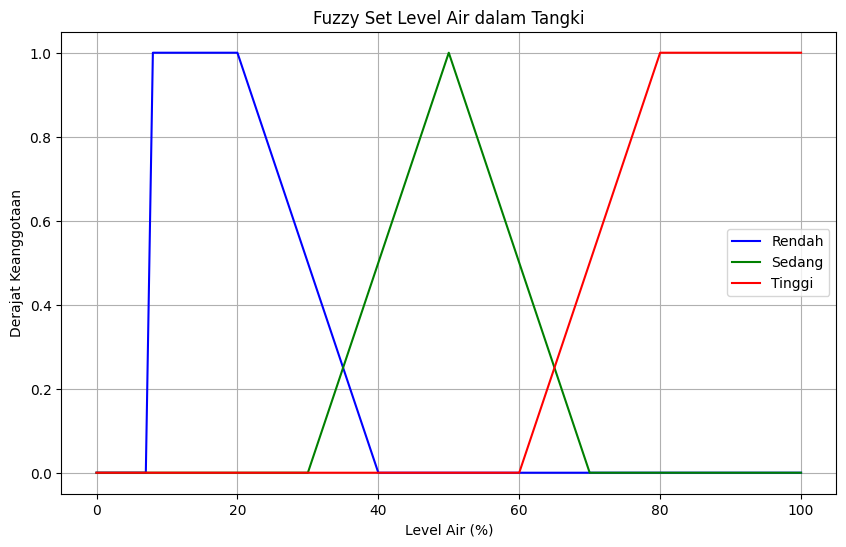

Derajat keanggotaan level air 25%:
- Rendah: 0.75
- Sedang: 0.00
- Tinggi: 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#Universe of discourse
level = np.arange(0, 101, 1)

#Fuzzy sets
rendah = fuzz.trapmf(level, [8, 8, 20, 40])
sedang = fuzz.trimf(level, [30, 50, 70])
tinggi = fuzz.trapmf(level, [60, 80, 100, 100])

#Visualize fuzzy sets
plt.figure(figsize=(10, 6))
plt.plot(level, rendah, 'b', linewidth=1.5, label='Rendah')
plt.plot(level, sedang, 'g', linewidth=1.5, label='Sedang')
plt.plot(level, tinggi, 'r', linewidth=1.5, label='Tinggi')
plt.title('Fuzzy Set Level Air dalam Tangki')
plt.xlabel('Level Air (%)')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

#Calculate membership for a specific input
input_level=25
level_rendah = fuzz.interp_membership(level, rendah, input_level)
level_sedang = fuzz.interp_membership(level, sedang, input_level)
level_tinggi = fuzz.interp_membership(level, tinggi, input_level)
print(f"Derajat keanggotaan level air {input_level}%:")
print(f"- Rendah: {level_rendah:.2f}")
print(f"- Sedang: {level_sedang:.2f}")
print(f"- Tinggi: {level_tinggi:.2f}")

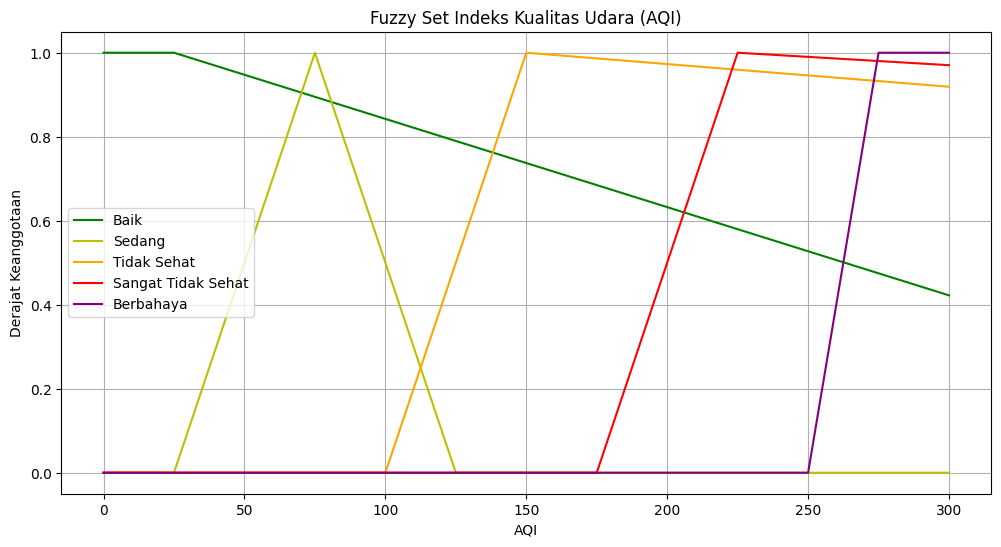

Derajat keanggotaan AQI 128:
- Baik: 0.78
- Sedang: 0.00
- Tidak Sehat: 0.56
- Sangat Tidak Sehat: 0.00
- Berbahaya: 0.00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

#Universe of discourse
aqi = np.arange(0, 301, 1)

#Fuzzy sets for Air Quality Index
baik = fuzz.trapmf(aqi, [0, 0, 25, 501])
sedang = fuzz.trimf(aqi, [25, 75, 125])
tidak_sehat = fuzz.trimf(aqi, [100, 150, 2001])
sangat_tidak_sehat = fuzz.trimf (aqi, [175, 225, 2751])
berbahaya = fuzz.trapmf(aqi, [250, 275, 300, 300])

#visualize fuzzy sets
plt.figure(figsize=(12, 6))
plt.plot(aqi, baik, 'g', linewidth=1.5, label= 'Baik')
plt.plot(aqi, sedang, 'y', linewidth=1.5, label= 'Sedang')
plt.plot(aqi, tidak_sehat, 'orange', linewidth=1.5, label= 'Tidak Sehat')
plt.plot(aqi, sangat_tidak_sehat,'r', linewidth=1.5, label='Sangat Tidak Sehat')
plt.plot(aqi, berbahaya, 'purple', linewidth=1.5, label= 'Berbahaya')
plt.title('Fuzzy Set Indeks Kualitas Udara (AQI)')
plt.xlabel('AQI')
plt.ylabel('Derajat Keanggotaan')
plt.legend()
plt.grid(True)
plt.show()

#Calculate membership for a specific input
input_aqi = 128
aqi_baik =fuzz.interp_membership(aqi, baik, input_aqi)
aqi_sedang = fuzz.interp_membership(aqi, sedang, input_aqi)
aqi_tidak_sehat = fuzz.interp_membership(aqi, tidak_sehat, input_aqi)
aqi_sangat_tidak_sehat = fuzz.interp_membership(aqi, sangat_tidak_sehat, input_aqi)
aqi_berbahaya = fuzz.interp_membership(aqi, berbahaya, input_aqi)
print(f"Derajat keanggotaan AQI {input_aqi}:")
print(f"- Baik: {aqi_baik:.2f}")
print(f"- Sedang: {aqi_sedang:.2f}")
print(f"- Tidak Sehat: {aqi_tidak_sehat:.2f}")
print(f"- Sangat Tidak Sehat: {aqi_sangat_tidak_sehat:.2f}")
print(f"- Berbahaya: {aqi_berbahaya:.2f}")

Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: 90.28%


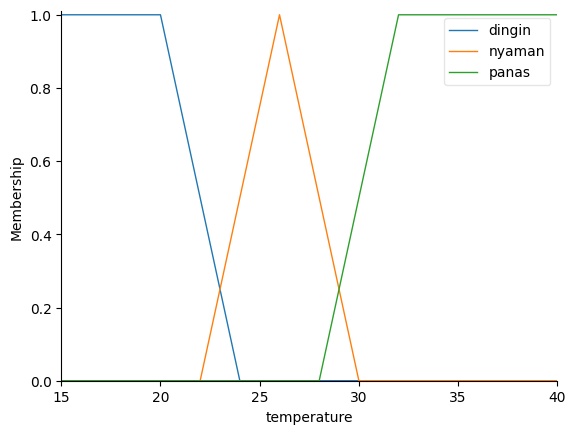

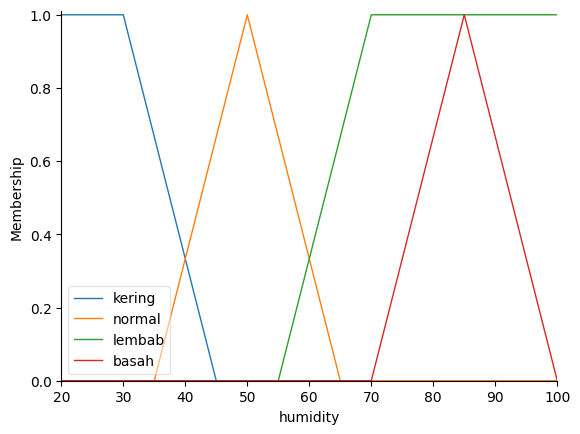

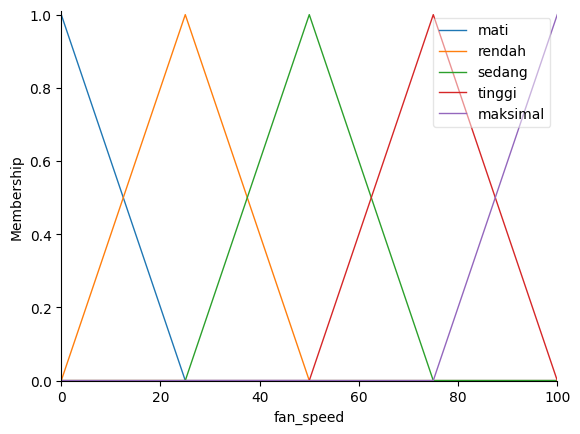

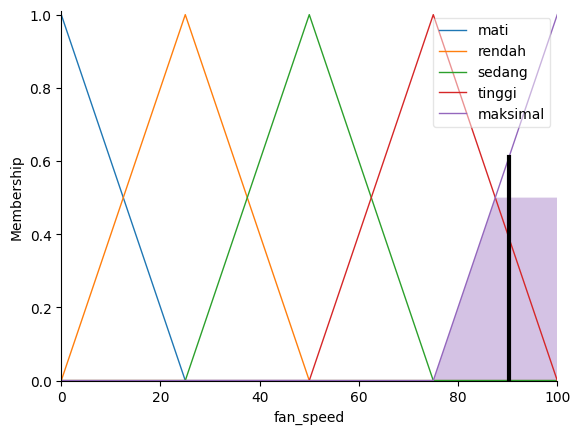

In [76]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])
humidity['basah'] = fuzz.trimf(humidity.universe, [70, 85, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [0, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])
rule10 = ctrl.Rule(temperature['panas'] & humidity['basah'], fan_speed['maksimal'])

# Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5,rule6, rule7, rule8, rule9, rule10
])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Input values
ac.input['temperature'] = 30
ac.input['humidity'] = 75

# Compute result
ac.compute()
print(f"Untuk suhu 30°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualize result
fan_speed.view(sim=ac)
plt.show()

Mengapa suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas"?
Suhu 28°C memiliki nilai keanggotaan di dua kategori ("nyaman" dan "panas") karena konsep dasar dari logika fuzzy adalah derajat keanggotaan—yaitu sebuah nilai bisa sebagian masuk ke lebih dari satu kategori.

Dalam logika klasik:
-Suhu 28°C hanya akan masuk ke satu kategori saja (misalnya, "nyaman").

Tapi dalam logika fuzzy:
-Suhu 28°C bisa memiliki derajat keanggotaan (membership) misalnya:
-0.6 di kategori "nyaman"
-0.4 di kategori "panas"

Ini karena fuzzy logic menggunakan kurva (bukan batas kaku) untuk menentukan kategori. Dan pada titik perpotongan dua kurva, satu nilai bisa termasuk ke dua kategori sekaligus.